In [20]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import figure
from sklearn import preprocessing
import scipy.stats as stats
import re

%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (8,6)

In [2]:
# Read in the data

df = pd.read_csv('movies.csv')

In [3]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

In [5]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing:.2f}%')

name - 0.00%
rating - 0.01%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.28%
gross - 0.02%
company - 0.00%
runtime - 0.00%


In [6]:
# Drop the missing values

df = df.dropna()

In [7]:
# data types of our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Change data types of our columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype('int64')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype('int64')

In [9]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [10]:
# Extract year from the string

df['correctyear'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [12]:
pd.set_option('display.max_rows',100)

In [13]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [14]:
# Drop any duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


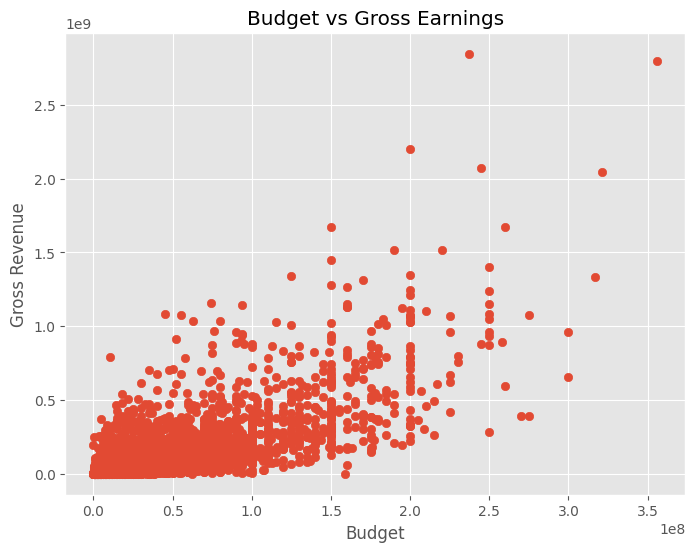

In [15]:
# Check for Correlations

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

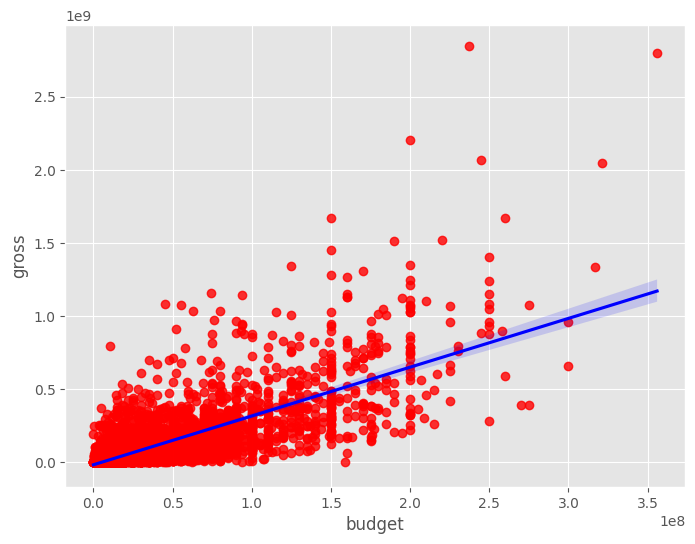

In [16]:
# plot using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [17]:
# Let's start looking at correlation

numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr(method='pearson')

,year,score,votes,budget,gross,runtime,correctyear
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correctyear,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [18]:
# High correlation between budget and gross

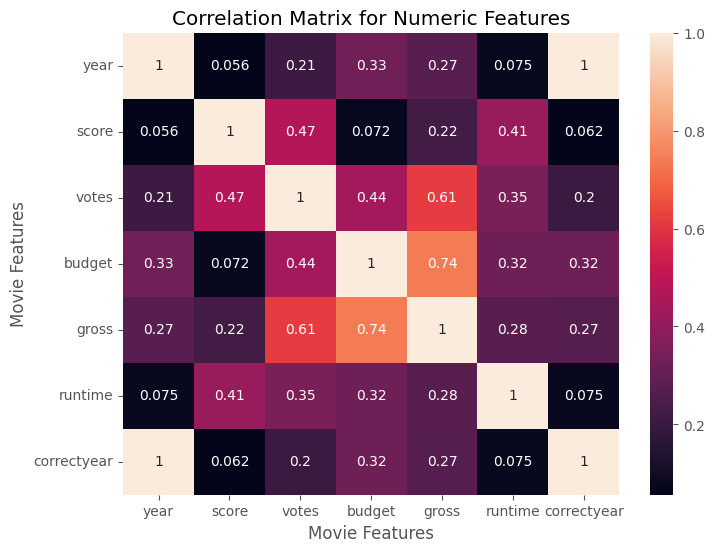

In [19]:
correlation_matrix = numeric_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [21]:
# Let's find correlation between categorical and numerical columns

In [37]:

le = preprocessing.LabelEncoder()
df['genre'] = le.fit_transform(df['genre'])
df['rating']= le.fit_transform(df['rating'])
df['country']= le.fit_transform(df['country'])
df['company']= le.fit_transform(df['company'])
df['director']= le.fit_transform(df['director'])
df['star']= le.fit_transform(df['star'])

In [23]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'correctyear'],
      dtype='object')

In [38]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,6,6,1980,"June 13, 1980 (United States)",8.4,927000.0,1795,Stephen King,699,46,19000000,46998772,1426,146.0,1980
1,The Blue Lagoon,6,1,1980,"July 2, 1980 (United States)",5.8,65000.0,1578,Henry De Vere Stacpoole,214,47,4500000,58853106,452,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,4,0,1980,"June 20, 1980 (United States)",8.7,1200000.0,757,Leigh Brackett,1157,47,18000000,538375067,945,124.0,1980
3,Airplane!,4,4,1980,"July 2, 1980 (United States)",7.7,221000.0,889,Jim Abrahams,1474,47,3500000,83453539,1108,88.0,1980
4,Caddyshack,6,4,1980,"July 25, 1980 (United States)",7.3,108000.0,719,Brian Doyle-Murray,271,47,6000000,39846344,1083,98.0,1980


In [26]:
stats.pointbiserialr(df['genre'], df['gross'])

SignificanceResult(statistic=-0.24410053673929816, pvalue=2.2665258796495334e-74)

In [27]:
# with this we can infer that genre and gross collection has weak correlation but it is statistically significant

In [28]:
stats.pointbiserialr(df['rating'], df['gross'])

SignificanceResult(statistic=-0.18190555213668028, pvalue=1.5023186767660843e-41)

In [29]:
# rating and gross collection has weak correlation but it is statistically significant

In [32]:
stats.pointbiserialr(df['company'], df['gross'])

SignificanceResult(statistic=0.14955258753404982, pvalue=1.7355520781532401e-28)

In [41]:
# It's having an positive correlation with gross collection but still its weakly correlated

In [40]:
stats.pointbiserialr(df['country'], df['gross'])

SignificanceResult(statistic=0.06007782365385156, pvalue=9.583890743918169e-06)

In [42]:
# Weak correlation between country and gross collection

In [44]:
corr_pairs = correlation_matrix.unstack()
corr_pairs

year         year           1.000000
             score          0.056386
             votes          0.206021
             budget         0.327722
             gross          0.274321
             runtime        0.075077
             correctyear    0.998726
score        year           0.056386
             score          1.000000
             votes          0.474256
             budget         0.072001
             gross          0.222556
             runtime        0.414068
             correctyear    0.061923
votes        year           0.206021
             score          0.474256
             votes          1.000000
             budget         0.439675
             gross          0.614751
             runtime        0.352303
             correctyear    0.203098
budget       year           0.327722
             score          0.072001
             votes          0.439675
             budget         1.000000
             gross          0.740247
             runtime        0.318695
 

In [45]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

year         score          0.056386
score        year           0.056386
correctyear  score          0.061923
score        correctyear    0.061923
             budget         0.072001
budget       score          0.072001
runtime      year           0.075077
year         runtime        0.075077
correctyear  runtime        0.075294
runtime      correctyear    0.075294
correctyear  votes          0.203098
votes        correctyear    0.203098
             year           0.206021
year         votes          0.206021
gross        score          0.222556
score        gross          0.222556
gross        correctyear    0.268721
correctyear  gross          0.268721
year         gross          0.274321
gross        year           0.274321
runtime      gross          0.275796
gross        runtime        0.275796
runtime      budget         0.318695
budget       runtime        0.318695
correctyear  budget         0.320312
budget       correctyear    0.320312
             year           0.327722
y

In [46]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
correctyear  year           0.998726
year         correctyear    0.998726
             year           1.000000
budget       budget         1.000000
gross        gross          1.000000
votes        votes          1.000000
score        score          1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

In [47]:
# Summary: By the analysis the gross collection is highly correlated with the number of votes and budget. 
# With country and company, it is weakly correlated.
# We can use the budget, votes and company name to predict gross collection using linear regression.